# AI-Based Insider Threat Detection System

**Objective:** Detect employees whose behavior deviates from normal patterns and may indicate insider threats using machine learning anomaly detection.

**Data:**  
- `total_emails`: Number of emails sent per user  
- `after_hours`: Number of actions outside normal work hours

**Approach:**  
1. Data preparation and feature engineering  
2. Exploratory Data Analysis (EDA) & Visualization  
3. Feature scaling  
4. Anomaly detection using multiple models:  
   - Isolation Forest  
   - One-Class SVM  
   - Local Outlier Factor (LOF)  
5. Compare models & flag suspicious users  
6. Visualizations & insights for business action

In [28]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Set visualization style
sns.set_style("whitegrid")

## Step 1: Load Data
- Load email logs and after-hours activity per user.
- Merge features into a single DataFrame.

In [29]:
# Replace these with your actual data loading if needed
# Example DataFrames:
# email_count: columns = ['user', 'total_emails']
# after_hours_count: columns = ['user', 'after_hours']

# Merge features
user_behavior = pd.merge(email_count, after_hours_count, on='user')
user_behavior.head()

,user,total_emails,after_hours
0,AAE0190,323,0
1,AAF0535,67,0
2,AAF0791,204,0
3,AAL0706,24,0
4,AAM0658,68,9


## Step 2: EDA & Visualization
- Understand normal vs unusual behavior
- Identify patterns or outliers

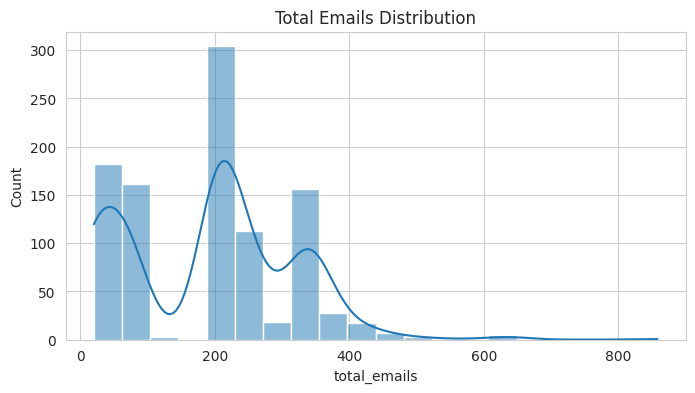

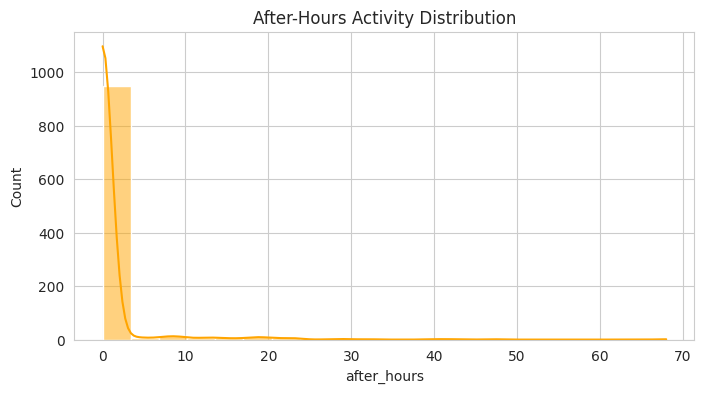

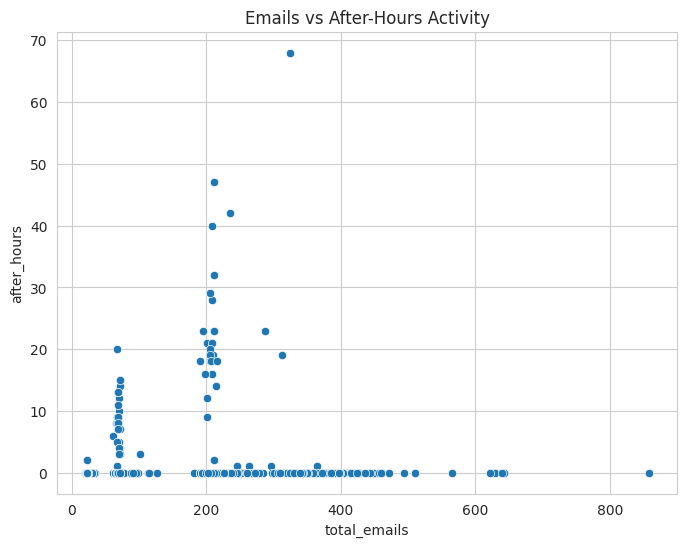

In [30]:
# Summary statistics
user_behavior.describe()

# Histograms
plt.figure(figsize=(8,4))
sns.histplot(user_behavior['total_emails'], bins=20, kde=True)
plt.title('Total Emails Distribution')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(user_behavior['after_hours'], bins=20, kde=True, color='orange')
plt.title('After-Hours Activity Distribution')
plt.show()

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=user_behavior, x='total_emails', y='after_hours')
plt.title('Emails vs After-Hours Activity')
plt.show()

## Step 3: Scale Features
- Scaling ensures anomaly detection models perform better

In [31]:
scaler = StandardScaler()
user_behavior_scaled = user_behavior.copy()
user_behavior_scaled[['total_emails','after_hours']] = scaler.fit_transform(
    user_behavior[['total_emails','after_hours']]
)
user_behavior_scaled.head()

,user,total_emails,after_hours
0,AAE0190,1.046517,-0.194819
1,AAF0535,-1.001352,-0.194819
2,AAF0791,0.094578,-0.194819
3,AAL0706,-1.345330,-0.194819
4,AAM0658,-0.993353,1.749049


## Step 4: Anomaly Detection — Isolation Forest
- Flags users whose behavior is unusual compared to others
- Red = Suspicious, Green = Normal

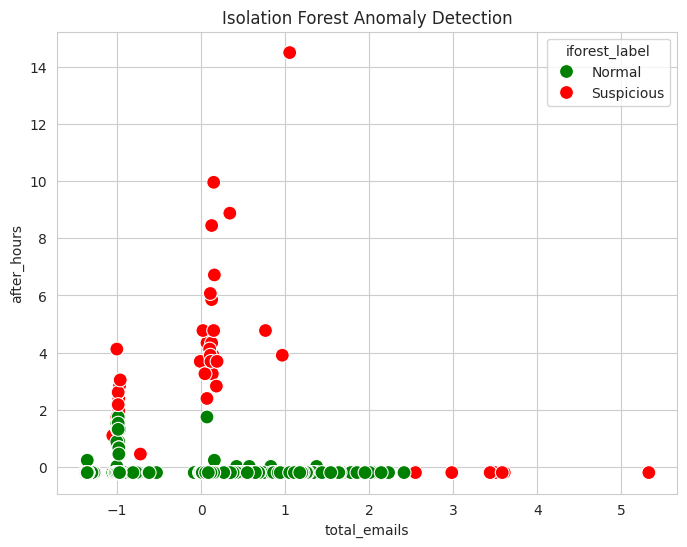

In [32]:
iforest = IsolationForest(contamination=0.05, random_state=42)
user_behavior_scaled['iforest_anomaly'] = iforest.fit_predict(
    user_behavior_scaled[['total_emails','after_hours']]
)
user_behavior_scaled['iforest_label'] = user_behavior_scaled['iforest_anomaly'].map({1:'Normal', -1:'Suspicious'})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=user_behavior_scaled,
    x='total_emails', y='after_hours',
    hue='iforest_label',
    palette={'Normal':'green','Suspicious':'red'},
    s=100
)
plt.title('Isolation Forest Anomaly Detection')
plt.show()

## Step 5: Additional Models — One-Class SVM & Local Outlier Factor
- Compare different models for consistency

In [33]:
# One-Class SVM
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
user_behavior_scaled['ocsvm_anomaly'] = ocsvm.fit_predict(
    user_behavior_scaled[['total_emails','after_hours']]
)
user_behavior_scaled['ocsvm_label'] = user_behavior_scaled['ocsvm_anomaly'].map({1:'Normal', -1:'Suspicious'})

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
user_behavior_scaled['lof_anomaly'] = lof.fit_predict(
    user_behavior_scaled[['total_emails','after_hours']]
)
user_behavior_scaled['lof_label'] = user_behavior_scaled['lof_anomaly'].map({1:'Normal', -1:'Suspicious'})

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


## Step 6: Compare Models
- Check which users are consistently flagged as suspicious

      user iforest_label ocsvm_label lof_label
0  AAE0190        Normal      Normal    Normal
1  AAF0535        Normal      Normal    Normal
2  AAF0791        Normal      Normal    Normal
3  AAL0706        Normal      Normal    Normal
4  AAM0658    Suspicious      Normal    Normal
5  AAN0823        Normal      Normal    Normal
6  AAS0442        Normal      Normal    Normal
7  AAV0450        Normal      Normal    Normal
8  AAW0353        Normal      Normal    Normal
9  ABC0174        Normal      Normal    Normal


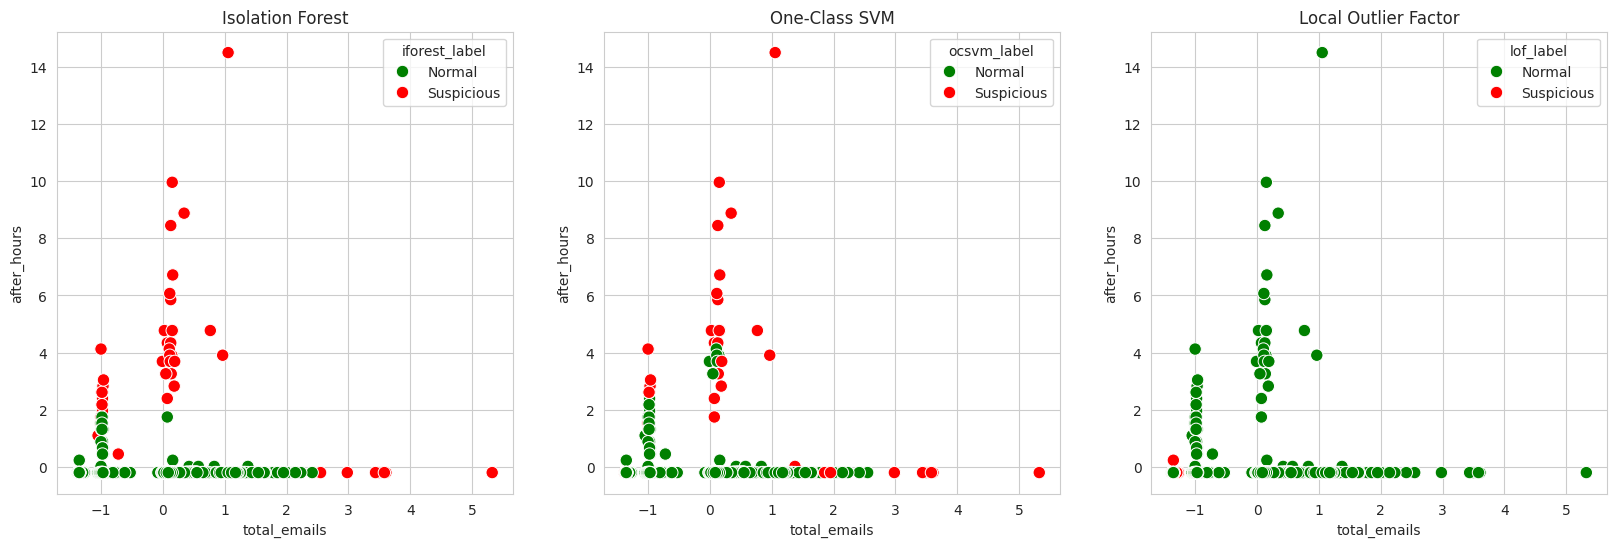

In [34]:
comparison = user_behavior_scaled[['user','iforest_label','ocsvm_label','lof_label']]
print(comparison.head(10))

# Optional: Visualize all 3 models side by side
fig, axes = plt.subplots(1,3, figsize=(20,6))

sns.scatterplot(data=user_behavior_scaled, x='total_emails', y='after_hours', hue='iforest_label',
                palette={'Normal':'green','Suspicious':'red'}, ax=axes[0], s=80)
axes[0].set_title('Isolation Forest')

sns.scatterplot(data=user_behavior_scaled, x='total_emails', y='after_hours', hue='ocsvm_label',
                palette={'Normal':'green','Suspicious':'red'}, ax=axes[1], s=80)
axes[1].set_title('One-Class SVM')

sns.scatterplot(data=user_behavior_scaled, x='total_emails', y='after_hours', hue='lof_label',
                palette={'Normal':'green','Suspicious':'red'}, ax=axes[2], s=80)
axes[2].set_title('Local Outlier Factor')

plt.show()

## Step 7: Insights

- Users flagged by multiple models are high-priority for review  
- Early detection of abnormal behavior reduces insider threat risk  
- Visualizations help non-technical stakeholders quickly understand suspicious patterns  
- This project demonstrates:
  - Data preprocessing & feature engineering
  - Multi-model anomaly detection
  - Clear business impact for cybersecurity